In [1]:
import pandas as pd
import urllib3
import requests
import numpy as np
import datetime
import requests
import re
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
ky_df=pd.read_csv("Kentucky_EVP.csv")
oh_df=pd.read_csv("ohio_EVP.csv")
wv_df=pd.read_csv("WV_EVP.csv")
socioEco_df=pd.read_csv("kvec-socio-economic-data-map-v2.csv")
indicators_df=pd.read_csv("20161109-ovr-elex-data.csv")

In [3]:
ky_df["countyState"] = ky_df["County"]+", "+ky_df["state"]
oh_df["countyState"] = oh_df["County"]+", "+oh_df["state"]
wv_df["countyState"] = wv_df["County"]+", "+wv_df["State"]
indicators_df["countyState"] = indicators_df["County"]+", "+indicators_df["state"]

In [4]:
indicators_df.head()

,FullCode,County,topCoalCounty,percInPoverty,uninsuredRateChange,ecoDistress,trumpVotes,clintonVotes,voteDifference,partyMajority,state,countyState
0,21001,Adair,no,26.3,-17,no,6637,1323,5.02,red,KY,"Adair, KY"
1,21003,Allen,no,19.0,-14,no,6466,1349,4.79,red,KY,"Allen, KY"
2,21005,Anderson,no,11.3,-11,no,8242,2634,3.13,red,KY,"Anderson, KY"
3,21007,Ballard,no,16.8,-13,no,3161,816,3.87,red,KY,"Ballard, KY"
4,21009,Barren,no,19.5,-14,no,13483,4275,3.15,red,KY,"Barren, KY"


In [5]:
ky_df=ky_df[['countyState', "eligible_voter_turnout"]]
oh_df=oh_df[['countyState', "eligible_voter_turnout"]]
wv_df=wv_df[["countyState", "eligible_voter_turnout"]]

In [6]:
turnout_df = pd.concat([ky_df,oh_df,wv_df], ignore_index=True)

In [7]:
df = pd.merge(socioEco_df, turnout_df, left_on="county_state", right_on="countyState")
data=pd.merge(df, indicators_df, left_on="countyState", right_on="countyState")

In [8]:
data = data[["county_state", "county", "state_x", "labor_force", "unemployment_rate", 'opioid_related_od',
     'below_130_poverty','btw_130_185_poverty', 'above_185_poverty', 'food_insecurity_rate',
     'eligible_voter_turnout', 'topCoalCounty', 'percInPoverty', 'uninsuredRateChange', 'ecoDistress',
       'trumpVotes', 'clintonVotes', 'voteDifference', 'partyMajority']]

In [9]:
data.head()

,county_state,county,state_x,labor_force,unemployment_rate,opioid_related_od,below_130_poverty,btw_130_185_poverty,above_185_poverty,food_insecurity_rate,eligible_voter_turnout,topCoalCounty,percInPoverty,uninsuredRateChange,ecoDistress,trumpVotes,clintonVotes,voteDifference,partyMajority
0,"Adair, KY",Adair,Kentucky,7095,0.062,0.0,0.63,0.19,0.18,0.161,55.80,no,26.3,-17,no,6637,1323,5.02,red
1,"Allen, KY",Allen,Kentucky,9432,0.039,0.5,0.61,0.24,0.15,0.135,52.90,no,19.0,-14,no,6466,1349,4.79,red
2,"Anderson, KY",Anderson,Kentucky,11756,0.044,0.5,0.45,0.20,0.35,0.110,70.75,no,11.3,-11,no,8242,2634,3.13,red
3,"Ballard, KY",Ballard,Kentucky,3776,0.073,0.5,0.57,0.19,0.24,0.138,64.53,no,16.8,-13,no,3161,816,3.87,red
4,"Barren, KY",Barren,Kentucky,19985,0.044,6.0,0.68,0.17,0.15,0.151,57.34,no,19.5,-14,no,13483,4275,3.15,red


In [10]:
#setting up the model for multiple regression
x_stats = data[['unemployment_rate',
       'food_insecurity_rate',
        'percInPoverty']].values
y_stats = data[['eligible_voter_turnout']].values

x_stats = sm.add_constant(x_stats)

## create and print the linear model
my_model = sm.OLS(y_stats, x_stats).fit()
my_predictions = my_model.predict(x_stats)

## r-squared explains the strength of the relationship between our model and the outcome

my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     28.04
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           9.83e-16
Time:                        17:31:06   Log-Likelihood:                -1047.0
No. Observations:                 263   AIC:                             2102.
Df Residuals:                     259   BIC:                             2116.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.0303      6.072     10.215      0.000      50.073      73.988
x1          -154.6777     60.840     -2.542      0.012    -274.482     -34.873
x2           225.2599     66.968      3.364      0.001      93.388     357.132
x3            -1.4662      0.252     -5.815      0.000      -1.963      -0.970
==============================================================================
Omnibus:                       24.863   Durbin-Watson:                   0.416
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.378
Skew:                          -0.384   Prob(JB):                      0.00124
Kurtosis:                       2.206   Cond. No.                     1.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

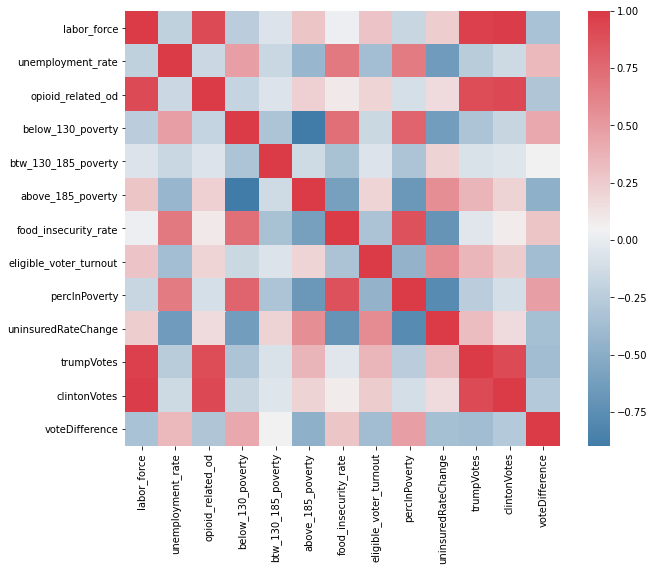

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

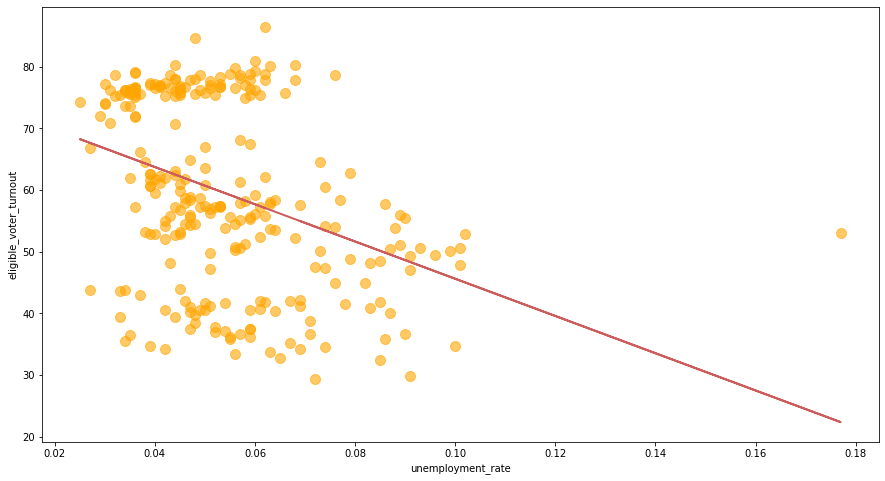

In [12]:
#setting variables
x = data[['unemployment_rate']].values
y = data[['eligible_voter_turnout']].values

### init the regression
my_regression = LinearRegression()

### fit our variables into it
my_regression.fit(x,y)

plt.figure(figsize=(15,8))

# fig.suptitle('Correlation between unemployment rate and voter turnout')
plt.xlabel('unemployment_rate')
plt.ylabel('eligible_voter_turnout')

### make the scatter in Blue
plt.scatter(x,y,color='orange',alpha=0.6, s=100)

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')

# plt.savefig("unemployment_rate_plot.svg", format="svg")

In [13]:
df.columns

Index(['state_fips', 'county_fips', 'geoid', 'county_state', 'county', 'state',
       'population', 'labor_force', 'employed', 'unemployed',
       'unemployment_rate', 'opioid_related_od', 'below_130_poverty',
       'btw_130_185_poverty', 'above_185_poverty', 'food_insecurity_rate',
       'est_food_insecury_people', 'le_2014_compared_STATE', 'le_2014',
       'countyState', 'eligible_voter_turnout'],
      dtype='object')

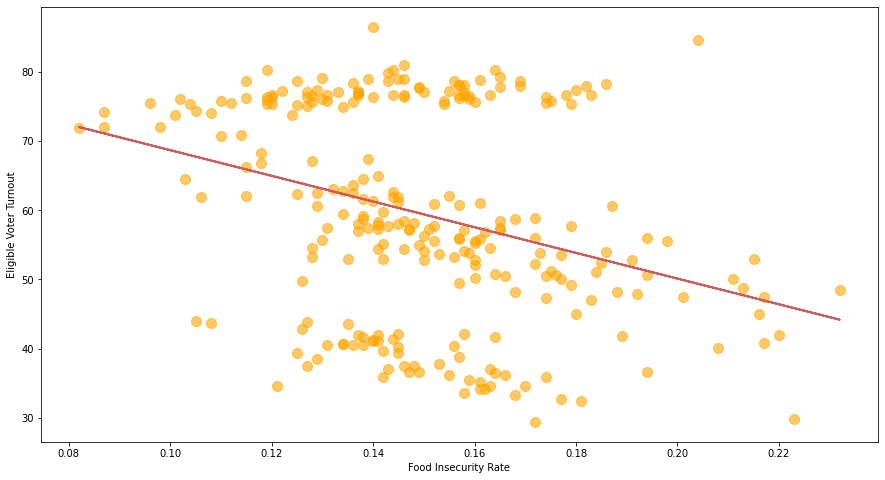

In [14]:
#setting variables
x = data[['food_insecurity_rate']].values
y = data[['eligible_voter_turnout']].values

### init the regression
my_regression = LinearRegression()

### fit our variables into it
my_regression.fit(x,y)

plt.figure(figsize=(15,8))
# fig.suptitle('Correlation between food insecurity rate and voter turnout')
plt.xlabel('Food Insecurity Rate')
plt.ylabel('Eligible Voter Turnout')

### make the scatter in Blue
plt.scatter(x,y,color='orange',alpha=0.6, s=100)

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')

# plt.savefig("food_insecurity_plot.svg", format="svg")

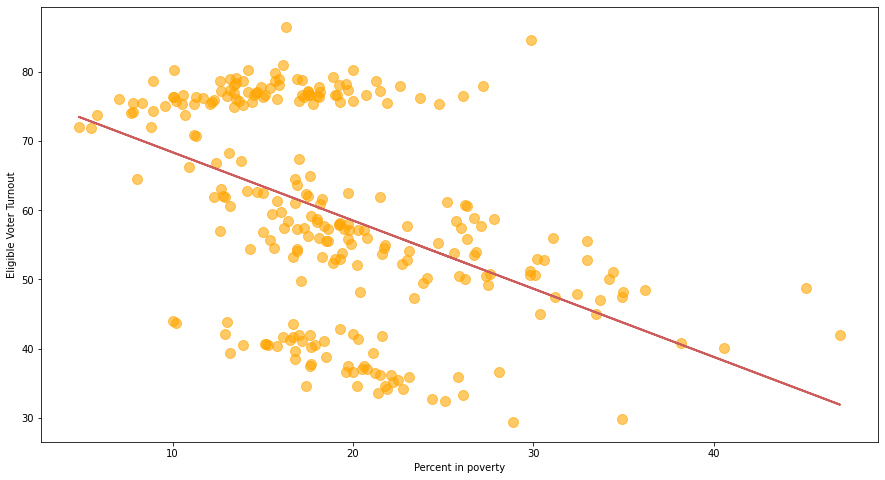

In [15]:
#setting variables
x = data[['percInPoverty']].values
y = data[['eligible_voter_turnout']].values

### init the regression
my_regression = LinearRegression()

### fit our variables into it
my_regression.fit(x,y)

plt.figure(figsize=(15,8))
# plt.set_title('Correlation between food insecurity and voter turnout')
plt.xlabel('Percent in poverty')
plt.ylabel('Eligible Voter Turnout')

### make the scatter in Blue
plt.scatter(x,y,color='orange',alpha=0.6, s=100)

### draw regression in red
## predict where the y is based on x
plt.plot(x, my_regression.predict(x), color='indianred', linewidth='2')
# plt.savefig("percent_poverty_plot.svg", format="svg")

<AxesSubplot:>

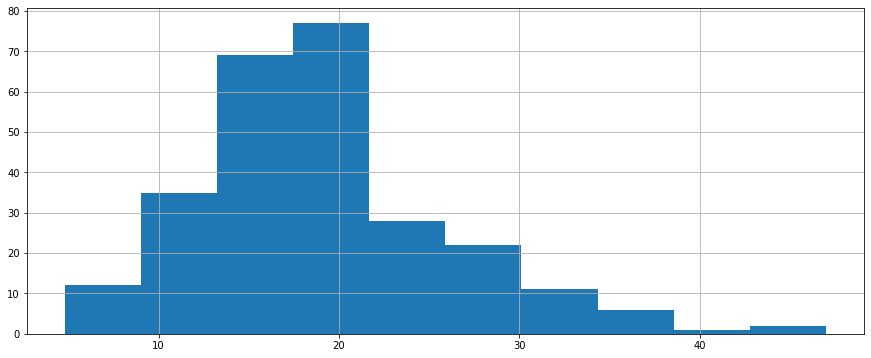

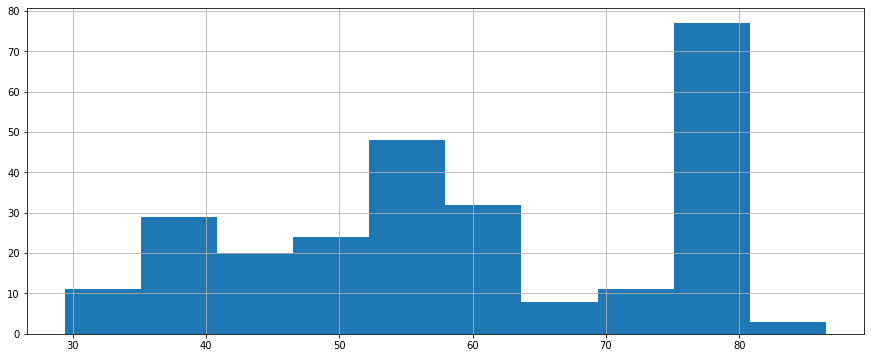

In [16]:
#make a histogram
poverty = plt.figure(1, figsize=(15,6))
data['percInPoverty'].hist()


# # histogram of meals, which is pct of students 
voters=plt.figure(2, figsize=(15,6))
data['eligible_voter_turnout'].hist()


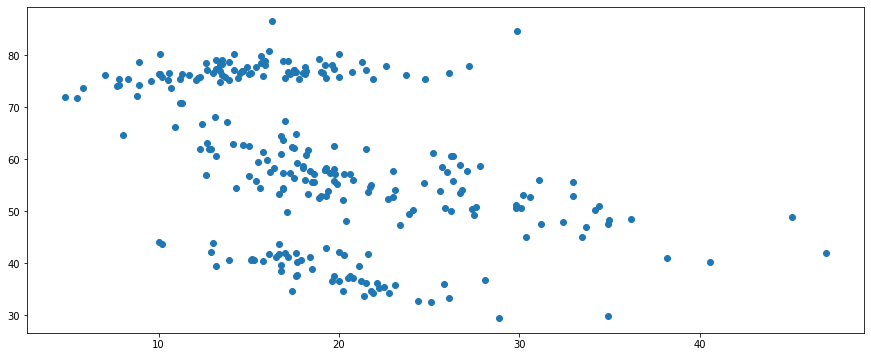

In [17]:
plt.figure(figsize=(15,6))
# data.plot(kind="scatter", x='percInPoverty', y='eligible_voter_turnout')

plt.scatter(data=data, x='percInPoverty', y='eligible_voter_turnout')

[[-185.45695598]]
[87.22117392]
[[-14749.33530426]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     30.52
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           7.99e-08
Time:                        17:31:08   Log-Likelihood:                -1069.5
No. Observations:                 263   AIC:                             2143.
Df Residuals:                     261   BIC:                             2150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


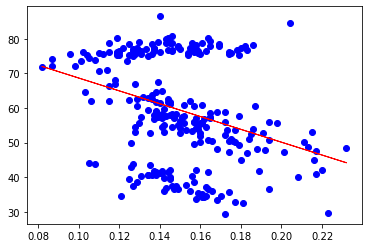

In [18]:
#set up basic regression analysis
x=data[['food_insecurity_rate']].values
y=data[['eligible_voter_turnout']].values

my_regression =LinearRegression()
my_regression.fit(x,y)

#make a scatter plot in blue and plot line in red

plt.scatter(x,y, color='blue')

#draw regression line in red

plt.plot(x, my_regression.predict(x), color='red', linewidth='1')

#what is the slope?
print(my_regression.coef_)

#what is the intercept(i.e. MEALS = 0)
print(my_regression.intercept_)

#what is the expected score for a school with 80 percent lower income students?
print(my_regression.predict([[80]]))

# outperforming_schools = ca_api_data[(ca_api_data['MEALS']>=80)& (ca_api_data['API12B']>=900)]
# print(outperforming_schools[['SNAME', 'MEALS', 'API12B']])

#get set up for statsmodels
X_stats = data[['food_insecurity_rate']].values
Y_stats = data[['eligible_voter_turnout']].values
X_stats=sm.add_constant(X_stats)

#create and print the model
my_model = sm.OLS(Y_stats, X_stats).fit()
my_predictions = my_model.predict(X_stats)

print(my_model.summary())
plt.show()

In [19]:
print("counties voted less than 40 percent:", (data["eligible_voter_turnout"]< 40).sum(), "counties")
print("counties voted less than 50 percent:", (data["eligible_voter_turnout"]< 50).sum(), "counties")
print("counties voted lesser than 60 percent:", (data["eligible_voter_turnout"]< 60).sum(), "counties")
print("counties voted greater than 60 percent:", (data["eligible_voter_turnout"]> 60).sum(), "counties")
print("counties voted greater than 70 percent:", (data["eligible_voter_turnout"]> 70).sum(), "counties")
print("counties voted greater than 80 percent:", (data["eligible_voter_turnout"]> 80).sum(), "counties")
print("counties voted greater than 90 percent:", (data["eligible_voter_turnout"]> 90).sum(), "counties")

counties voted less than 40 percent: 32 counties
counties voted less than 50 percent: 72 counties
counties voted lesser than 60 percent: 144 counties
counties voted greater than 60 percent: 119 counties
counties voted greater than 70 percent: 91 counties
counties voted greater than 80 percent: 6 counties
counties voted greater than 90 percent: 0 counties


In [20]:
data.state_x.value_counts()

Kentucky         120
Ohio              88
West Virginia     55
Name: state_x, dtype: int64

In [21]:
data[(data["eligible_voter_turnout"] < 70) & (data["state_x"] == "Ohio")].sort_values("eligible_voter_turnout").head(30)

,county_state,county,state_x,labor_force,unemployment_rate,opioid_related_od,below_130_poverty,btw_130_185_poverty,above_185_poverty,food_insecurity_rate,eligible_voter_turnout,topCoalCounty,percInPoverty,uninsuredRateChange,ecoDistress,trumpVotes,clintonVotes,voteDifference,partyMajority
157,"Holmes, OH",Holmes,Ohio,21334,0.027,0.0,0.59,0.29,0.12,0.118,66.8,no,12.4,0,no,8578,1766,4.86,red


In [22]:
oh_df.sort_values("eligible_voter_turnout")

,countyState,eligible_voter_turnout
0,"Holmes, OH",66.8
1,"Delaware, OH",72.0
2,"Shelby, OH",73.7
3,"Warren, OH",73.7
4,"Union, OH",74.0
...,...,...
83,"Jefferson, OH",80.3
84,"Portage, OH",80.3
85,"Belmont, OH",80.9
86,"Athens, OH",84.6


In [23]:
(wv_df["eligible_voter_turnout"] > 50 ).sum()

0

In [24]:
data[data["state_x"] == "West Virginia"].sort_values("eligible_voter_turnout")

,county_state,county,state_x,labor_force,unemployment_rate,opioid_related_od,below_130_poverty,btw_130_185_poverty,above_185_poverty,food_insecurity_rate,eligible_voter_turnout,topCoalCounty,percInPoverty,uninsuredRateChange,ecoDistress,trumpVotes,clintonVotes,voteDifference,partyMajority
218,"Gilmer, WV",Gilmer,West Virginia,2440,0.072,0.0,0.48,0.11,0.41,0.172,29.42,no,28.9,-19,yes,1889,537,3.52,red
231,"McDowell, WV",McDowell,West Virginia,4735,0.091,7.0,0.69,0.12,0.19,0.223,29.82,no,34.9,-16,yes,4614,1429,3.23,red
215,"Clay, WV",Clay,West Virginia,3196,0.085,0.0,0.68,0.09,0.24,0.181,32.51,no,25.1,-14,yes,2289,566,4.04,red
229,"Lincoln, WV",Lincoln,West Virginia,7238,0.065,6.0,0.64,0.10,0.26,0.177,32.77,no,24.4,-16,yes,5257,1435,3.66,red
258,"Webster, WV",Webster,West Virginia,3474,0.056,1.0,0.67,0.21,0.12,0.168,33.36,no,26.1,-15,yes,2284,554,4.12,red
217,"Fayette, WV",Fayette,West Virginia,15531,0.063,13.0,0.57,0.22,0.22,0.158,33.68,no,21.4,-15,no,10263,4246,2.42,red
213,"Cabell, WV",Cabell,West Virginia,41611,0.042,119.0,0.57,0.12,0.32,0.162,34.17,no,21.9,-13,no,19648,11306,1.74,red
262,"Wyoming, WV",Wyoming,West Virginia,7041,0.069,12.0,0.60,0.17,0.24,0.161,34.25,yes,22.8,-15,no,6527,1061,6.15,red
230,"Logan, WV",Logan,West Virginia,10829,0.074,10.0,0.57,0.16,0.27,0.170,34.56,yes,20.2,-14,no,9866,2082,4.74,red
214,"Calhoun, WV",Calhoun,West Virginia,2598,0.100,0.0,0.52,0.25,0.23,0.163,34.63,no,21.8,-11,yes,2023,456,4.44,red


In [25]:
data[data["state_x"] == "Kentucky"].sort_values("eligible_voter_turnout")

,county_state,county,state_x,labor_force,unemployment_rate,opioid_related_od,below_130_poverty,btw_130_185_poverty,above_185_poverty,food_insecurity_rate,eligible_voter_turnout,topCoalCounty,percInPoverty,uninsuredRateChange,ecoDistress,trumpVotes,clintonVotes,voteDifference,partyMajority
79,"Martin, KY",Martin,Kentucky,3013,0.087,0.5,0.71,0.12,0.18,0.208,40.13,no,40.6,-18,yes,3503,363,9.65,red
25,"Clay, KY",Clay,Kentucky,5987,0.083,5.0,0.81,0.06,0.13,0.217,40.89,no,38.2,-17,yes,5861,752,7.79,red
23,"Christian, KY",Christian,Kentucky,26008,0.062,0.5,0.59,0.23,0.18,0.189,41.81,no,21.6,-15,no,14108,7188,1.96,red
73,"McCreary, KY",McCreary,Kentucky,4804,0.067,0.0,0.86,0.09,0.05,0.220,41.99,no,47.0,-19,yes,5012,664,7.55,red
87,"Morgan, KY",Morgan,Kentucky,4653,0.076,0.5,0.70,0.12,0.17,0.180,44.96,no,30.4,-17,yes,3628,1006,3.61,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,"Marshall, KY",Marshall,Kentucky,15618,0.057,0.5,0.50,0.25,0.25,0.118,68.20,no,13.1,-13,no,12322,3672,3.36,red
2,"Anderson, KY",Anderson,Kentucky,11756,0.044,0.5,0.45,0.20,0.35,0.110,70.75,no,11.3,-11,no,8242,2634,3.13,red
119,"Woodford, KY",Woodford,Kentucky,15493,0.031,0.5,0.46,0.15,0.39,0.114,70.87,no,11.2,-10,no,7697,4958,1.55,red
92,"Oldham, KY",Oldham,Kentucky,32662,0.036,0.5,0.30,0.10,0.60,0.082,71.81,no,5.5,-8,no,20469,10268,1.99,red


In [26]:
data[data["state_x"] == "Ohio"].sort_values("eligible_voter_turnout")

,county_state,county,state_x,labor_force,unemployment_rate,opioid_related_od,below_130_poverty,btw_130_185_poverty,above_185_poverty,food_insecurity_rate,eligible_voter_turnout,topCoalCounty,percInPoverty,uninsuredRateChange,ecoDistress,trumpVotes,clintonVotes,voteDifference,partyMajority
157,"Holmes, OH",Holmes,Ohio,21334,0.027,0.0,0.59,0.29,0.12,0.118,66.8,no,12.4,0,no,8578,1766,4.86,red
140,"Delaware, OH",Delaware,Ohio,104636,0.029,10.0,0.28,0.13,0.60,0.087,72.0,no,4.8,-4,no,55660,39584,1.41,red
202,"Warren, OH",Warren,Ohio,114850,0.034,57.0,0.30,0.13,0.57,0.101,73.7,no,5.8,-5,no,75947,33036,2.30,red
194,"Shelby, OH",Shelby,Ohio,23973,0.035,11.0,0.48,0.16,0.36,0.124,73.7,no,10.7,-8,no,18148,4143,4.38,red
199,"Union, OH",Union,Ohio,27759,0.030,5.0,0.42,0.15,0.43,0.108,74.0,no,7.7,-7,no,17601,7530,2.34,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,"Jefferson, OH",Jefferson,Ohio,28118,0.068,10.0,0.59,0.14,0.27,0.164,80.3,yes,20.0,-12,no,20668,9483,2.18,red
186,"Portage, OH",Portage,Ohio,86784,0.044,33.0,0.54,0.10,0.36,0.144,80.3,no,14.2,-10,no,38978,31463,1.24,red
126,"Belmont, OH",Belmont,Ohio,30199,0.060,10.0,0.53,0.17,0.31,0.146,80.9,yes,16.1,-12,no,20729,8652,2.40,red
124,"Athens, OH",Athens,Ohio,29451,0.048,8.0,0.70,0.04,0.26,0.204,84.6,no,29.9,-16,yes,10816,15552,1.44,blue


In [27]:
(data["eligible_voter_turnout"] >60).sum()

119

In [28]:
data[data["ecoDistress"] == 'yes']["eligible_voter_turnout"].mean()

51.85888888888889

In [29]:
data[data["percInPoverty"] <= 10].count()

county_state              15
county                    15
state_x                   15
labor_force               15
unemployment_rate         15
opioid_related_od         15
below_130_poverty         15
btw_130_185_poverty       15
above_185_poverty         15
food_insecurity_rate      15
eligible_voter_turnout    15
topCoalCounty             15
percInPoverty             15
uninsuredRateChange       15
ecoDistress               15
trumpVotes                15
clintonVotes              15
voteDifference            15
partyMajority             15
dtype: int64

In [30]:
data[data["county"] == "McCracken"]

,county_state,county,state_x,labor_force,unemployment_rate,opioid_related_od,below_130_poverty,btw_130_185_poverty,above_185_poverty,food_insecurity_rate,eligible_voter_turnout,topCoalCounty,percInPoverty,uninsuredRateChange,ecoDistress,trumpVotes,clintonVotes,voteDifference,partyMajority
72,"McCracken, KY",McCracken,Kentucky,29885,0.062,6.0,0.53,0.17,0.29,0.155,62.06,no,17.5,-12,no,20774,9134,2.27,red


In [31]:
(data["eligible_voter_turnout"]>70).sum()

91

In [32]:
(data["unemployment_rate"]>0.047).sum()

151

In [33]:
((data["food_insecurity_rate"] *100)>=10).sum()

258

In [34]:
(data["eligible_voter_turnout"] <60.1).sum()

144

In [35]:
(data["eligible_voter_turnout"] <50).sum()

72

In [42]:
(data[data["state_x"] == 'West Virginia']["eligible_voter_turnout"] < 40).sum()

32

In [44]:
(data["percInPoverty"] > 10).sum()

248

In [46]:
(data[data["state_x"] == 'West Virginia']["percInPoverty"] <10).sum()

0

In [51]:
data[data["percInPoverty"] < 10]["eligible_voter_turnout"]

7      64.56
92     71.81
107    72.08
125    75.50
140    72.00
142    75.10
147    75.50
162    78.70
171    76.10
173    74.30
188    74.20
199    74.00
202    73.70
Name: eligible_voter_turnout, dtype: float64

In [56]:
data.sort_values("eligible_voter_turnout", ascending=False)

,county_state,county,state_x,labor_force,unemployment_rate,opioid_related_od,below_130_poverty,btw_130_185_poverty,above_185_poverty,food_insecurity_rate,eligible_voter_turnout,topCoalCounty,percInPoverty,uninsuredRateChange,ecoDistress,trumpVotes,clintonVotes,voteDifference,partyMajority
180,"Noble, OH",Noble,Ohio,4774,0.062,2.0,0.45,0.20,0.35,0.140,86.50,yes,16.3,-11,no,4441,1201,3.70,red
124,"Athens, OH",Athens,Ohio,29451,0.048,8.0,0.70,0.04,0.26,0.204,84.60,no,29.9,-16,yes,10816,15552,1.44,blue
126,"Belmont, OH",Belmont,Ohio,30199,0.060,10.0,0.53,0.17,0.31,0.146,80.90,yes,16.1,-12,no,20729,8652,2.40,red
186,"Portage, OH",Portage,Ohio,86784,0.044,33.0,0.54,0.10,0.36,0.144,80.30,no,14.2,-10,no,38978,31463,1.24,red
160,"Jefferson, OH",Jefferson,Ohio,28118,0.068,10.0,0.59,0.14,0.27,0.164,80.30,yes,20.0,-12,no,20668,9483,2.18,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,"Webster, WV",Webster,West Virginia,3474,0.056,1.0,0.67,0.21,0.12,0.168,33.36,no,26.1,-15,yes,2284,554,4.12,red
229,"Lincoln, WV",Lincoln,West Virginia,7238,0.065,6.0,0.64,0.10,0.26,0.177,32.77,no,24.4,-16,yes,5257,1435,3.66,red
215,"Clay, WV",Clay,West Virginia,3196,0.085,0.0,0.68,0.09,0.24,0.181,32.51,no,25.1,-14,yes,2289,566,4.04,red
231,"McDowell, WV",McDowell,West Virginia,4735,0.091,7.0,0.69,0.12,0.19,0.223,29.82,no,34.9,-16,yes,4614,1429,3.23,red


In [60]:
data[data["state_x"] =="Ohio"]["eligible_voter_turnout"].min()

66.8